In [5]:
import sys
import os

# Add the root directory of your project to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # Adjust based on your folder structure

In [6]:
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

./.ipynb_checkpoints/test_mnist-checkpoint.ipynb
./test_mnist.ipynb
./.ipynb_checkpoints


In [7]:
import torch
import matplotlib.pyplot as plt
from data.dataset import get_mnist_dataloader
from models.model import SimpleNN
from train.train import evaluate_model

In [8]:
# Hyperparameters
INPUT_SIZE = 28 * 28  # MNIST images are 28x28 pixels
HIDDEN_SIZE = 128
OUTPUT_SIZE = 10  # Digits 0-9
BATCH_SIZE = 64
EPOCHS = 5
LEARNING_RATE = 0.001

In [9]:
# Check for GPU availability
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: mps


In [10]:
# Load Data
train_loader, test_loader = get_mnist_dataloader(batch_size=BATCH_SIZE)

# Initialize Model
model = SimpleNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device)

100.0%
100.0%
100.0%
100.0%


In [11]:
# Load the trained model
model.load_state_dict(torch.load('../mnist_model.pth', map_location=device))
model.eval()  # Set model to evaluation mode

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

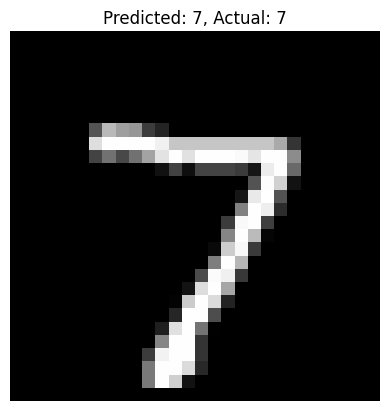

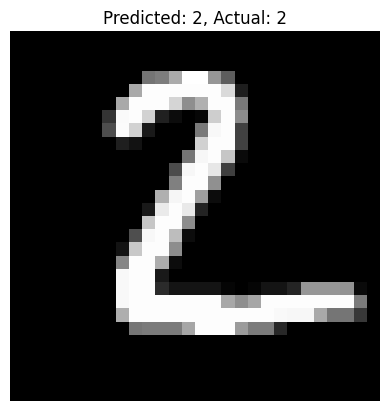

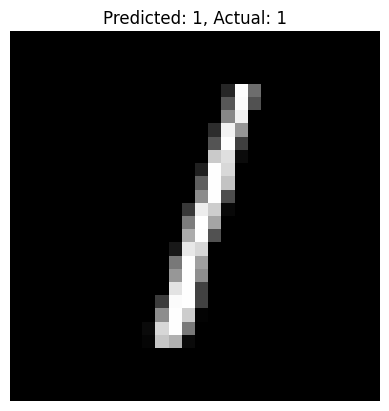

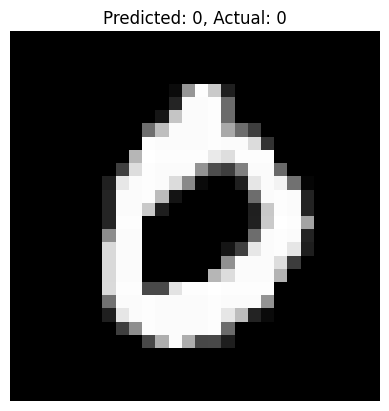

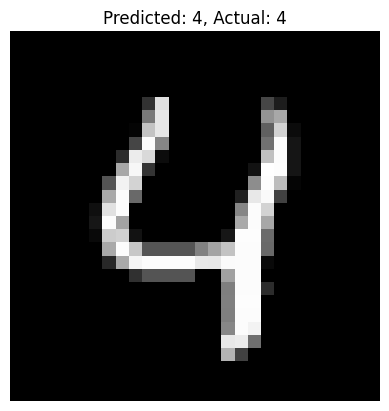

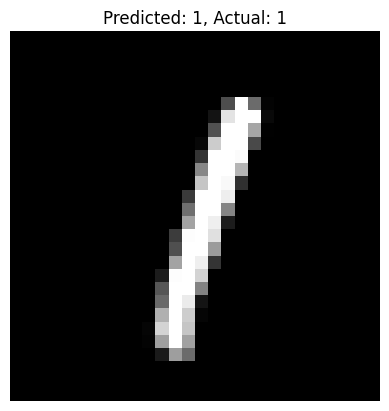

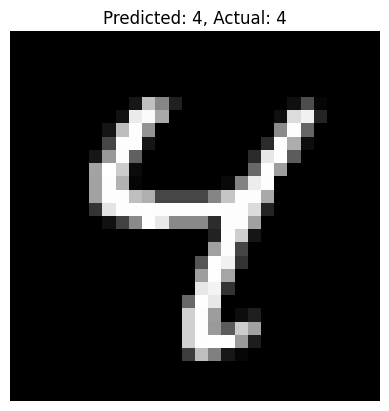

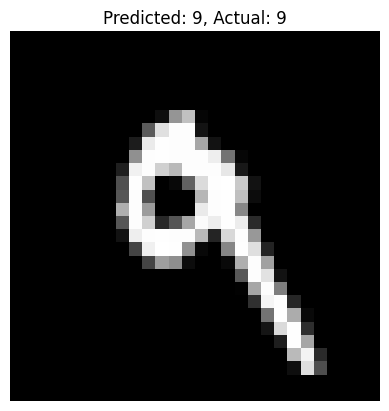

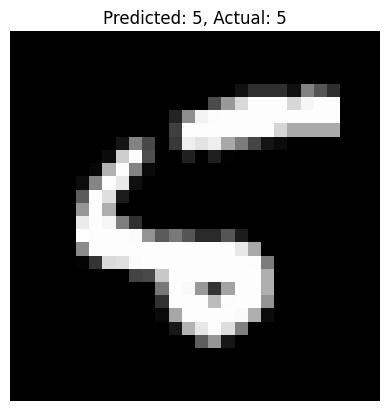

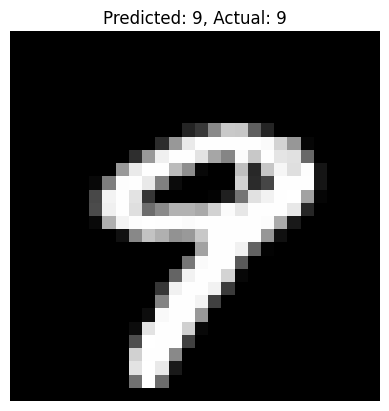

In [14]:
# Run Inference on a Test Image
test_iter = iter(test_loader)
images, labels = next(test_iter)
images, labels = images.to(device), labels.to(device)

for i in range(0,10):
    # Select a single image from the batch
    image = images[i].cpu().squeeze()  # Use the first image in the batch
    label = labels[i].cpu()  # Get the actual label of the first image
    
    # Flatten the image before feeding it into the model
    image_flat = image.view(1, -1)
    
    # Perform inference with no gradient computation
    with torch.no_grad():
        output = model(image_flat.to(device))  # Feed the image through the model
        _, predicted = torch.max(output, 1)  # Get the predicted class
    
    # Visualize the image
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {predicted.item()}, Actual: {label.item()}')
    plt.axis('off')  # Hide axes
    plt.show()